# Analyze COVID-19 deaths using dataset from CDC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

## Download the [dataset](https://catalog.data.gov/dataset/conditions-contributing-to-deaths-involving-coronavirus-disease-2019-covid-19-by-age-group)

In [64]:
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')
df.head(20)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN
5,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,129005.0,133088.0,NaN
6,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,138503.0,141868.0,NaN
7,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,121119.0,123018.0,NaN
8,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,12.0,12.0,NaN
9,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,531174.0,545947.0,NaN


## All COVID-19 deaths 

In [65]:
all_deaths_covid19 = df.loc[(df['Group']=='By Total') & (df['Age Group']=='All Ages') & (df['State']=='United States') & (df['Condition Group']=='COVID-19'), :]
all_deaths_covid19["COVID-19 Deaths"]

229    1146242.0
Name: COVID-19 Deaths, dtype: float64

## All deaths for all conditions. This value indicates that the dataset has overlap for conditions. A patient might have had more than one condition.

In [66]:
deaths = df.loc[(df['Group']=='By Total') & (df['Age Group']=='All Ages') & (df['State']=='United States') & (df['Condition Group']!='COVID-19'), :]
deaths['COVID-19 Deaths'].agg('sum')

3270694.0

## Deaths grouped by age

In [67]:
deaths_by_age = df.loc[(df['Group']=='By Total') & (df['Age Group']!='All Ages') & (df['Age Group']!='Not stated'), ['Age Group', 'Group', 'Condition', 'Condition Group', 'COVID-19 Deaths']].groupby(['Age Group'], as_index=False).agg('sum')

In [68]:
deaths_by_age

,Age Group,COVID-19 Deaths
0,0-24,26238.0
1,25-34,85846.0
2,35-44,220816.0
3,45-54,544115.0
4,55-64,1250217.0
5,65-74,2043874.0
6,75-84,2363238.0
7,85+,2318454.0


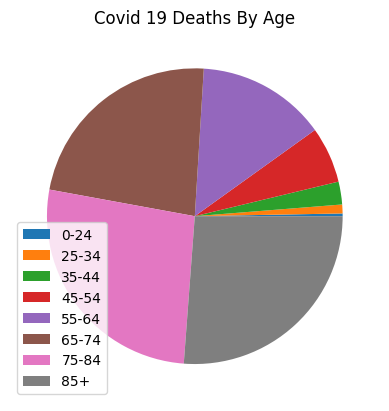

In [32]:
plt.pie(deaths_by_age['COVID-19 Deaths'])
plt.legend(labels=deaths_by_age['Age Group'], loc='best')
plt.title('Covid 19 Deaths By Age')
plt.show()

## All deaths resulting from other conditions

In [69]:
deaths_from_conditions = df.loc[(df['Group']=='By Total') & (df['Age Group']!='All Ages') & (df['Age Group']!='Not stated') & (df['Condition Group']!='COVID-19'), ['Age Group', 'Group', 'Condition', 'Condition Group', 'COVID-19 Deaths']]
deaths_from_conditions


,Age Group,Group,Condition,Condition Group,COVID-19 Deaths
0,0-24,By Total,Influenza and pneumonia,Respiratory diseases,1569.0
1,25-34,By Total,Influenza and pneumonia,Respiratory diseases,5804.0
2,35-44,By Total,Influenza and pneumonia,Respiratory diseases,15080.0
3,45-54,By Total,Influenza and pneumonia,Respiratory diseases,37414.0
4,55-64,By Total,Influenza and pneumonia,Respiratory diseases,82668.0
...,...,...,...,...,...
12403,45-54,By Total,All other conditions and causes (residual),All other conditions and causes (residual),198.0
12404,55-64,By Total,All other conditions and causes (residual),All other conditions and causes (residual),361.0
12405,65-74,By Total,All other conditions and causes (residual),All other conditions and causes (residual),551.0
12406,75-84,By Total,All other conditions and causes (residual),All other conditions and causes (residual),823.0


## Deaths grouped by condition group

In [70]:
deaths_by_condition_group = deaths_from_conditions.groupby('Condition Group', as_index=False).sum('COVID-19 Deaths')
deaths_by_condition_group

,Condition Group,COVID-19 Deaths
0,All other conditions and causes (residual),957898.0
1,Alzheimer disease,70805.0
2,Circulatory diseases,1643582.0
3,Diabetes,338282.0
4,"Intentional and unintentional injury, poisonin...",62075.0
5,Malignant neoplasms,143364.0
6,Obesity,106566.0
7,Renal failure,260110.0
8,Respiratory diseases,2545844.0
9,Sepsis,239213.0


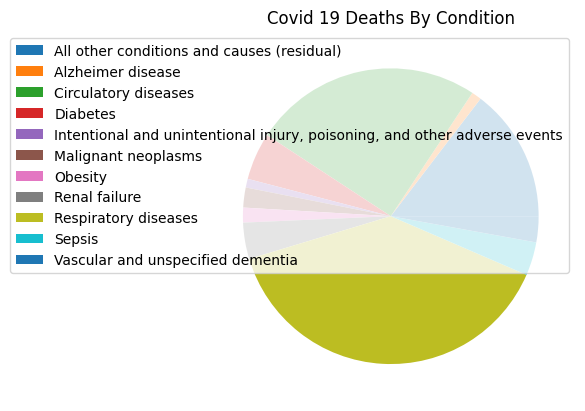

In [71]:
plt.pie(deaths_by_condition_group['COVID-19 Deaths'])
plt.legend(labels=deaths_by_condition_group['Condition Group'])
plt.title('Covid 19 Deaths By Condition')
plt.show()